<a href="https://colab.research.google.com/github/Sakeet/oibsip/blob/oibsip_task1/RetailSalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
print(list(df.columns))

['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [ ]:
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df.duplicated().sum()

0

EDA

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


Basic Statistics

In [ ]:
#Descriptive Statistics: Calculate Basic Statistics(mean,median,mode,standard deviation)
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df[['Age', 'Price per Unit', 'Total Amount']].median()

,0
Age,42.0
Price per Unit,50.0
Total Amount,135.0


In [ ]:
df[['Age', 'Price per Unit', 'Total Amount']].mode()

,Age,Price per Unit,Total Amount
0,43,50.0,50.0
1,64,NaN,NaN


Time Series Analysis

In [ ]:
#Time Series Analysis
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date',inplace=True)
df = df.sort_index()

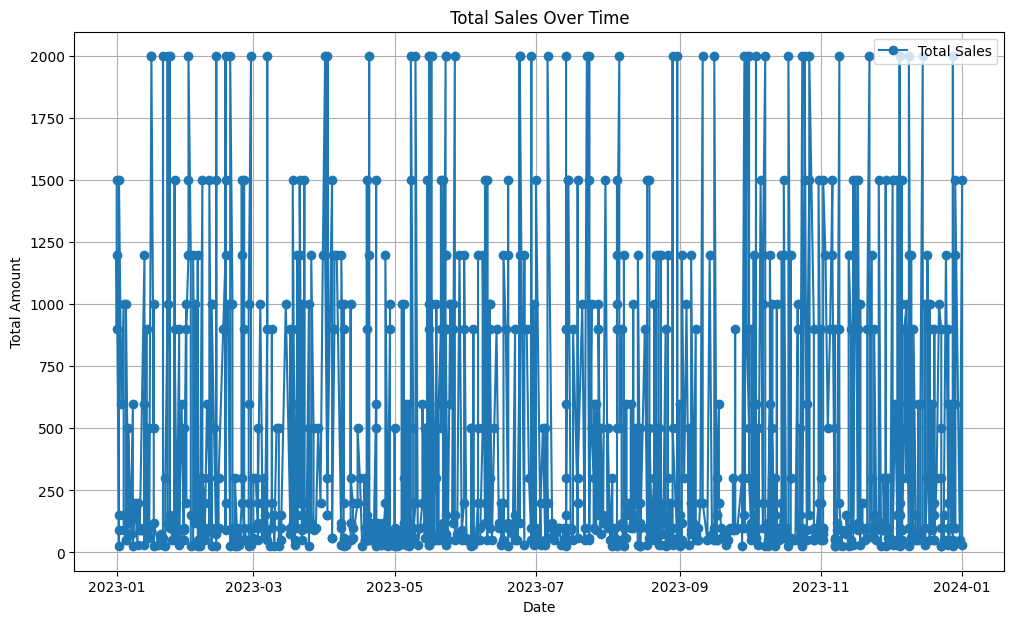

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df.index,df['Total Amount'],marker='o',linestyle='-',label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
monthly_sales=df['Total Amount'].resample('ME').sum()

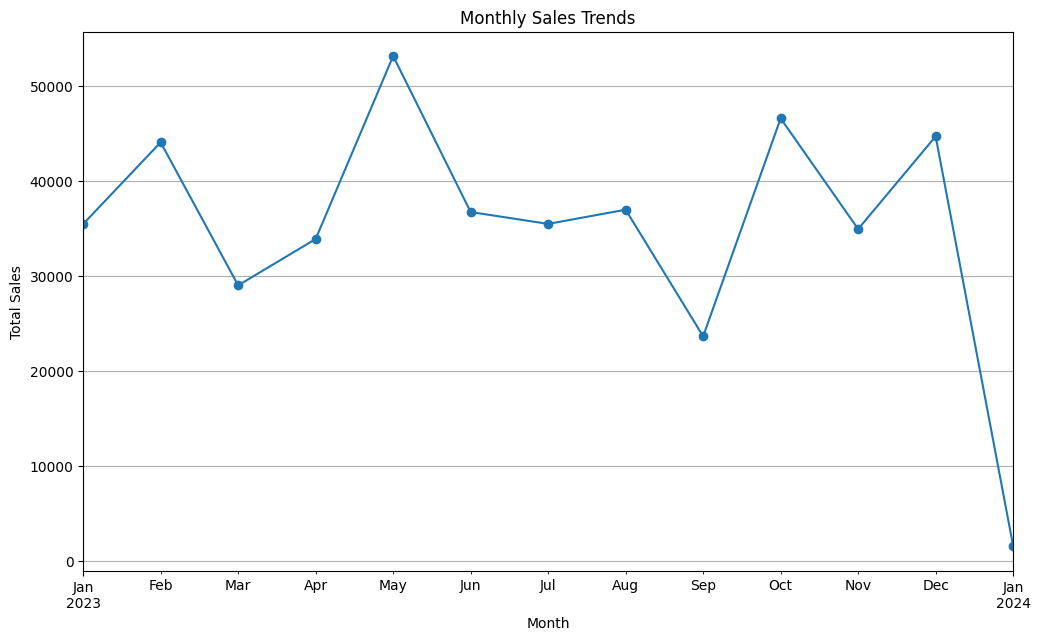

In [ ]:
plt.figure(figsize=(12,7))
monthly_sales.plot(marker='o',linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Customer and Product Analysis

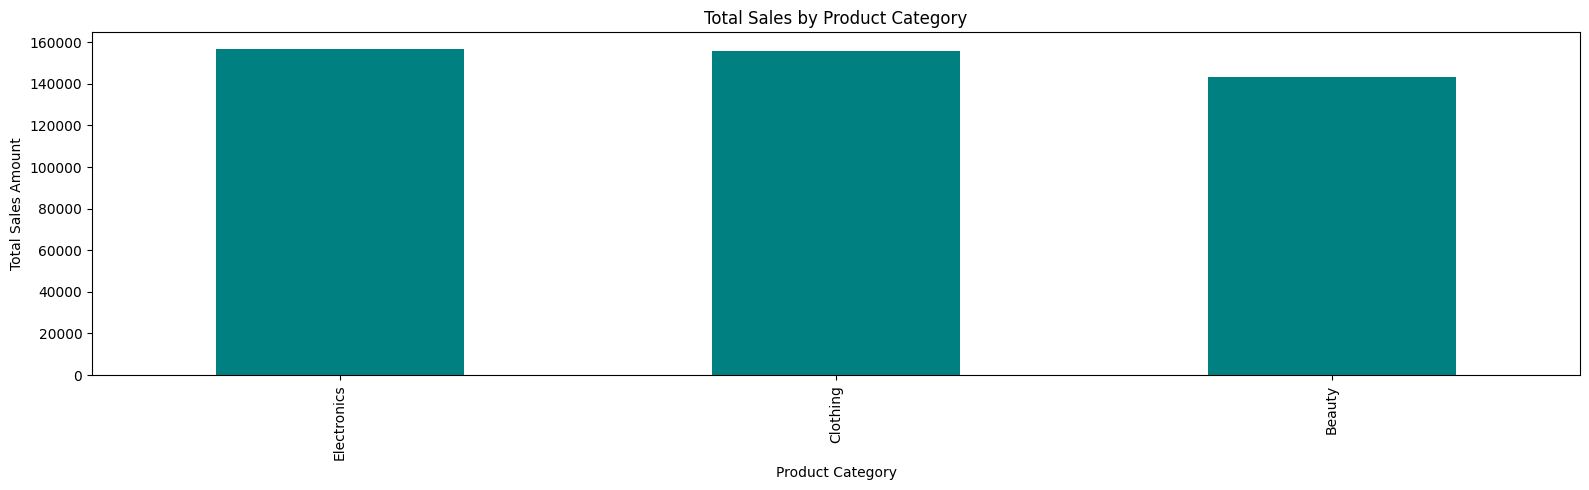

In [ ]:
#Customer and Product Analysis:Analyze Purchasing Behavior
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Create 'Age Group' based on 'Age' column and Group by 'Age Group' and calculate the mean spending
df['Age Group'] = pd.cut(df['Age'],bins=[0,25,35,45,55,65,75],labels=['0-25','26-35','36-45','46-55','56-65','66-75'])
age_group_spending = df.groupby('Age Group',observed=False)['Total Amount'].mean().sort_index()

# Plotting in a more modular way using the object-oriented approach
fig, axes = plt.subplots(1, 1, figsize=(16, 5))

# Plot the data
product_sales.plot(kind ='bar', color = 'teal')

# Set title and labels using the axes object
axes.set_title('Total Sales by Product Category')
axes.set_xlabel('Product Category')
axes.set_ylabel('Total Sales Amount')

# Adjust layout to prevent clipping of titles/labels
plt.tight_layout()

# Show the plot
plt.show()

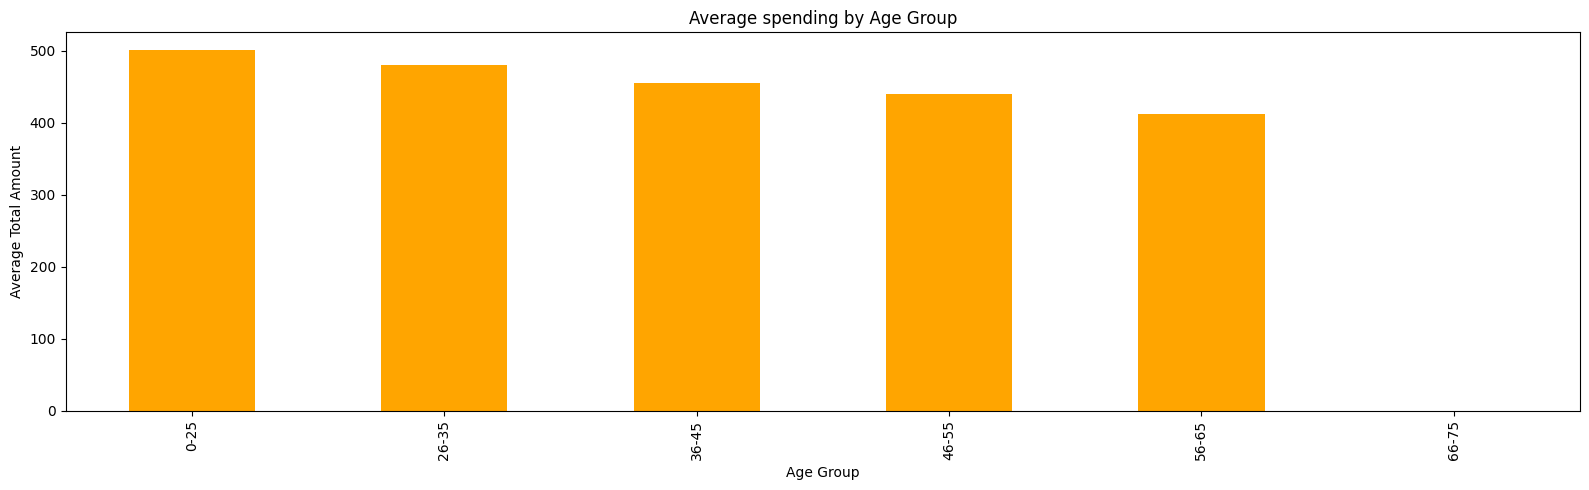

In [ ]:
#Customer and Product Analysis:Analyze Purchasing Behavior
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

df['Age Group'] = pd.cut(df['Age'],bins=[0,25,35,45,55,65,75],labels=['0-25','26-35','36-45','46-55','56-65','66-75'])
age_group_spending = df.groupby('Age Group',observed=False)['Total Amount'].mean().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(16, 5))

age_group_spending.plot(kind='bar',color='orange')
axes.set_title('Average spending by Age Group')
axes.set_xlabel('Age Group')
axes.set_ylabel('Average Total Amount')

plt.tight_layout()

plt.show()

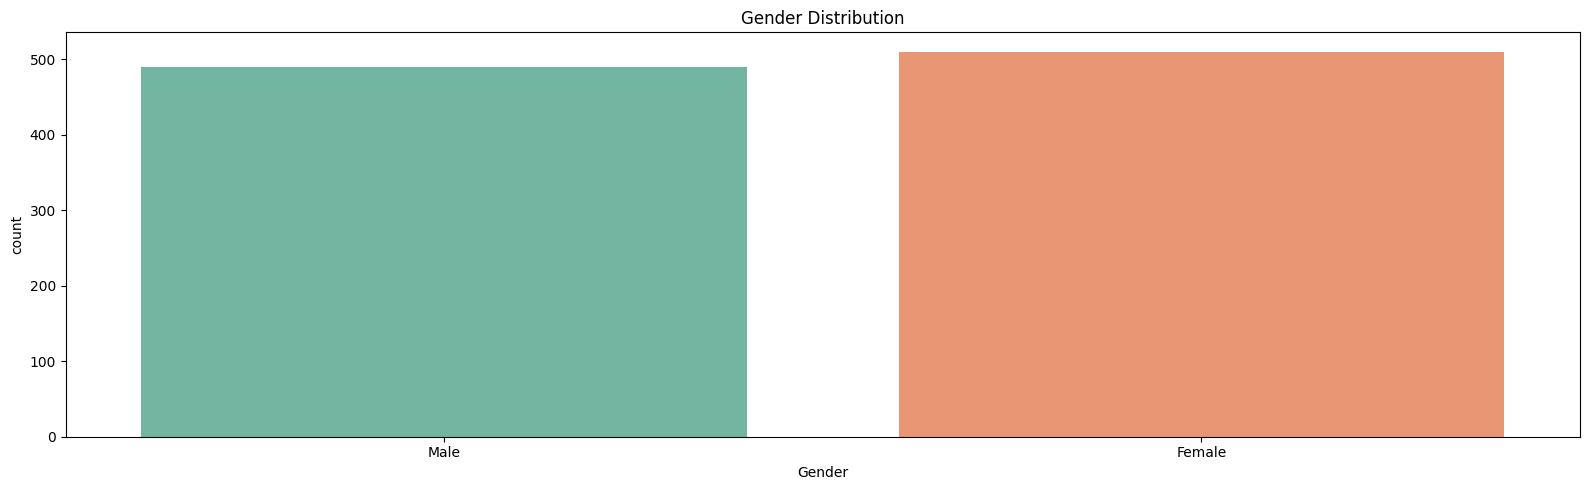

In [ ]:
#Customer and Product Analysis
fig,axes =plt.subplots(1, 1, figsize=(16,5))

# Create the countplot for 'Gender' with hue and palette settings and Set the title using the ax object
sns.countplot(x='Gender',data=df,hue='Gender',legend=False,palette='Set2')
axes.set_title('Gender Distribution')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

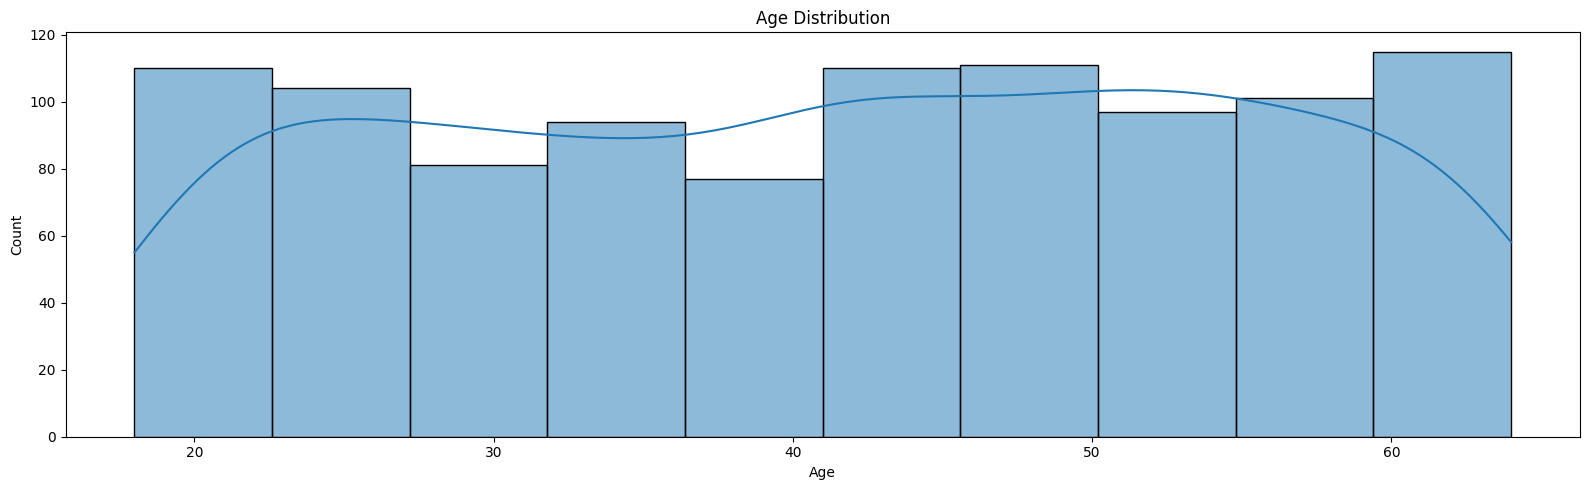

In [ ]:
#Customer and Product Analysis
fig,axes =plt.subplots(1, 1, figsize=(16,5))

sns.histplot(df['Age'],bins=10,kde=True)
axes.set_title('Age Distribution')
axes.set_xlabel('Age')

plt.tight_layout()

plt.show()


Visualization

In [ ]:
df["Product Category"].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


<Axes: xlabel='Product Category', ylabel='count'>

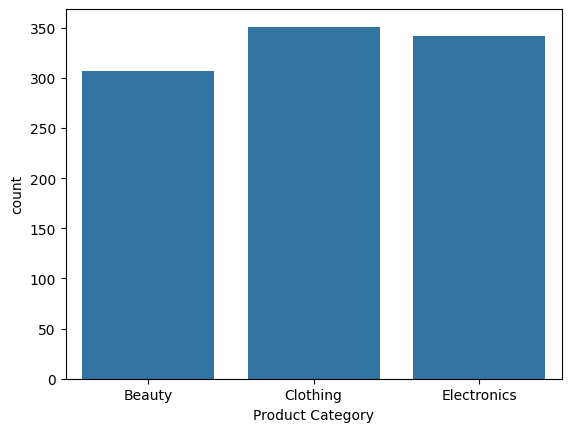

In [ ]:
sns.countplot(x=df["Product Category"])

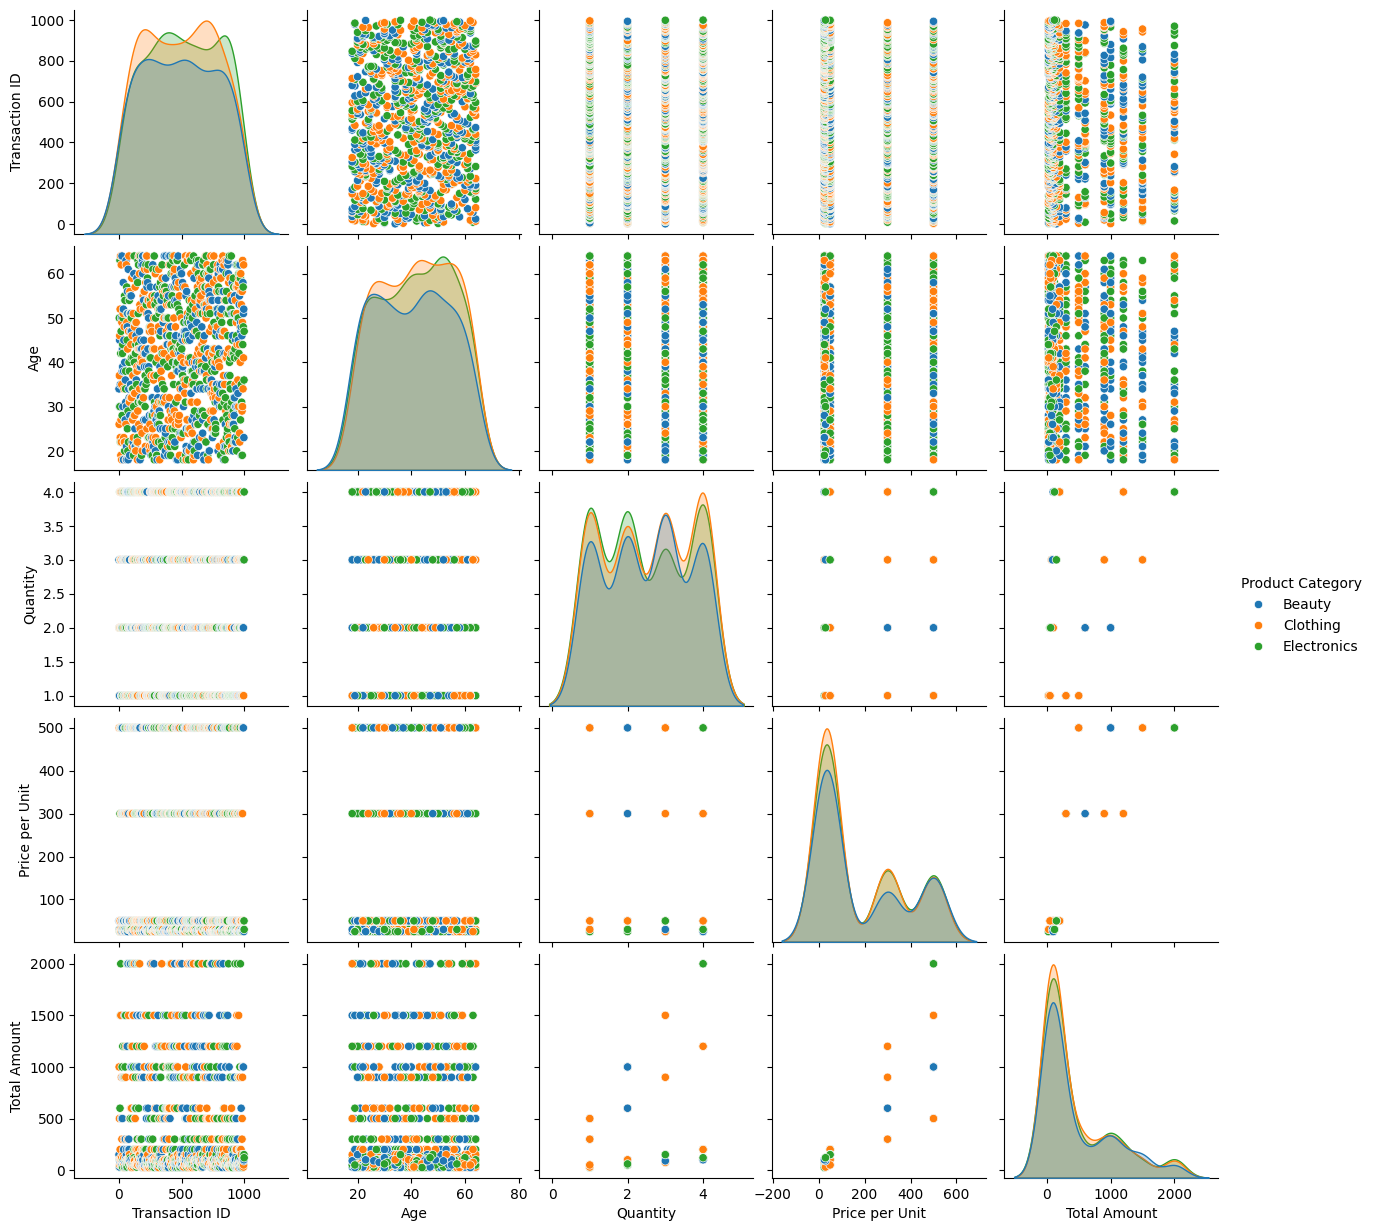

In [ ]:
sns.pairplot(df,hue="Product Category")

In [ ]:
df1 = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()

In [ ]:
df1

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


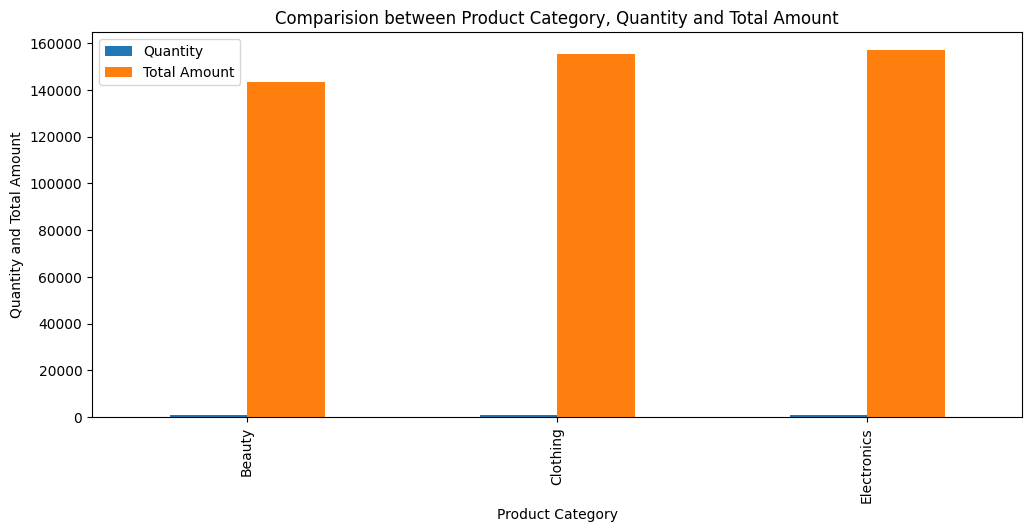

In [ ]:
df1.plot(kind="bar", figsize=(12,5))
plt.title("Comparision between Product Category, Quantity and Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()

In [ ]:
df3 = df["Product Category"].value_counts()

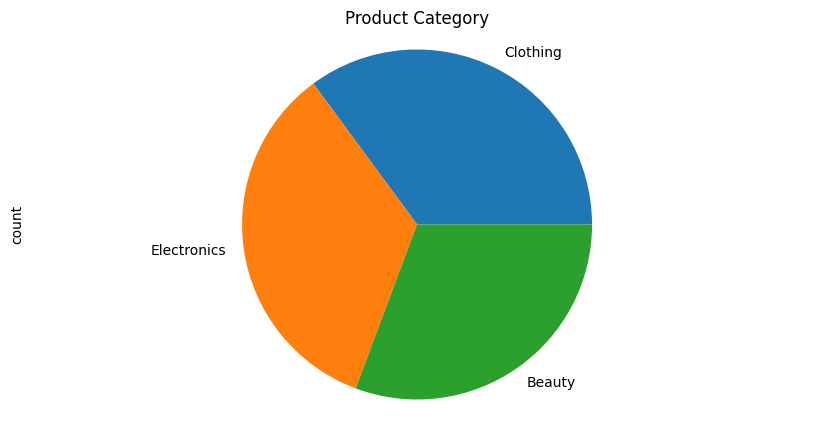

In [ ]:
explode_list = [0,0.1,0.1]
color_list = ["Orange","Blue","Green"]
df3.plot(kind="pie", figsize=(10,5))
plt.title("Product Category")
plt.axis("Equal")
plt.show()


In [ ]:
gender=df["Gender"].value_counts()

In [ ]:
gender

,count
Gender,
Female,510
Male,490


Male=Red,Female=Orange


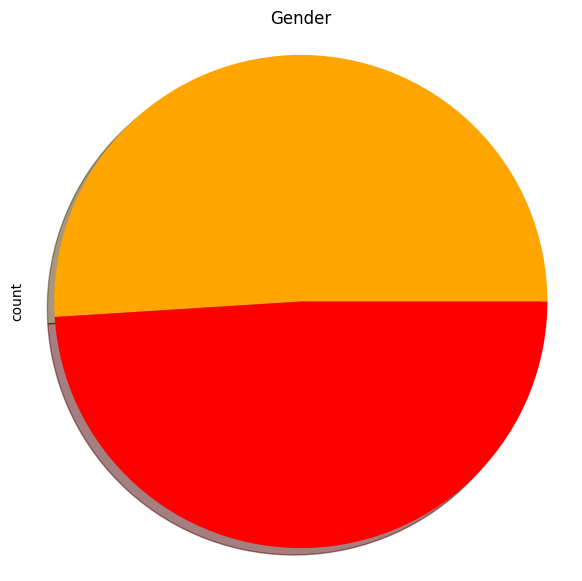

In [ ]:
gender.plot(kind="pie",figsize=(7,7),shadow=True,labels=None,colors=["orange","red"])
print("Male=Red,Female=Orange")
plt.title("Gender")
plt.axis("Equal")
plt.show()

In [ ]:
#Customer Segmentation Analysis
top_customers=df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)

Top 5 Customers by Total Spend
Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64


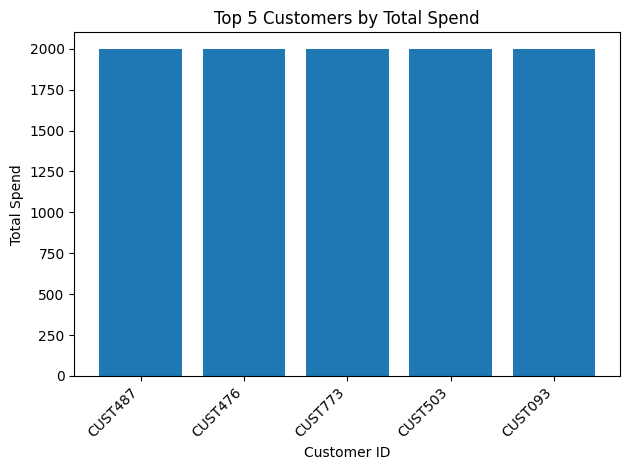

In [ ]:
print("Top 5 Customers by Total Spend")
print(top_customers)

plt.bar(x=top_customers.index,height=top_customers.values)
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Recommendations


Sales Strategies: The montly sales show high product sells in certain months. On the high peak months try to promote about the product through events and other things which can promote the product. On the weak sales months do some disconts which will attract the people more on the weak months.


Product Focus: Try to maintain a variety of products which would attract lot of people and different age people which will increase sales of the shop and increase the profit of the company.